In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import networkx as nx

In [125]:
import fincorrnets as fnx

In [128]:
import fincorrnets.ramping as rmp

In [4]:
fnx.viz.plot_edges??

## Binomial approximation

In [5]:
import ipywidgets

In [6]:
import numpy as np
import math
import pandas as pd

In [7]:
n, p, k = 1000, 0.1, 1

np.log((1-p) ** (n-1-k)),   -p*n

(-105.14979462651063, -100.0)

In [276]:
n = 1000
p = 0.003
c = p * (n-1)
p_k = np.exp(-c)
p_k, c

(0.049936653838985136, 2.997)

## The random graph model

In [56]:
math.factorial(6)

720

In [278]:
g = nx.generators.gnp_random_graph(n, p)

## X

In [7]:
from bokeh.palettes import Paired

In [13]:
Paired[12]

['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928']

In [286]:
from bokeh.plotting import figure, output_notebook, show, save
output_notebook()

Loading BokehJS ...

In [284]:
layout = nx.layout.spring_layout(g, k=0.4, iterations=300)

In [288]:
save(p, filename='../figures/graph1.png')

/usr/local/anaconda3/lib/python3.5/site-packages/bokeh/io.py:433: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warnings.warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/usr/local/anaconda3/lib/python3.5/site-packages/bokeh/io.py:443: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warnings.warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/miguel/Jottacloud/Oxford/MSc-Thesis/figures/graph1.png'

In [292]:
p = figure(plot_width=700, plot_height=700)
p.xaxis.visible = False
p.xgrid.visible = False
p.yaxis.visible = False
p.ygrid.visible = False
p.outline_line_alpha = 0
ds_edges, df_edges = fnx.edges_datasource(g, layout=layout, line_width=lambda x: x)
ds_nodes, df_nodes = fnx.nodes_datasource(g, layout=layout)
fnx.plot_edges(p, ds=ds_edges)
fnx.plot_nodes(p, ds=ds_nodes)

# show the results

show(p)


In [ ]:
p_k = math.factorial(6)

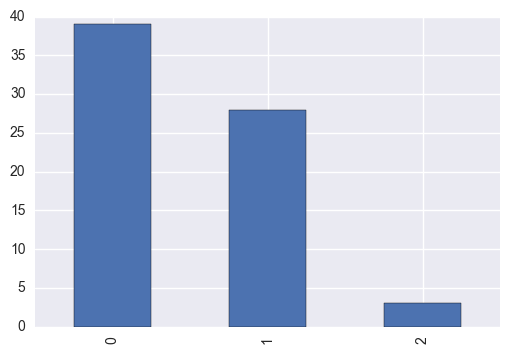

In [275]:
%matplotlib inline
ser = pd.Series(nx.degree_histogram(g))
ser.plot.bar();

## Giant component

In [230]:
c = np.linspace(0.00001,4, 100)
# s = - 1 / c * np.log( 1.0 / c)
# s = s * (c > 1)

In [9]:
s = np.linspace(0.000001, .999999, 200)
c = - np.log(1-s) / s

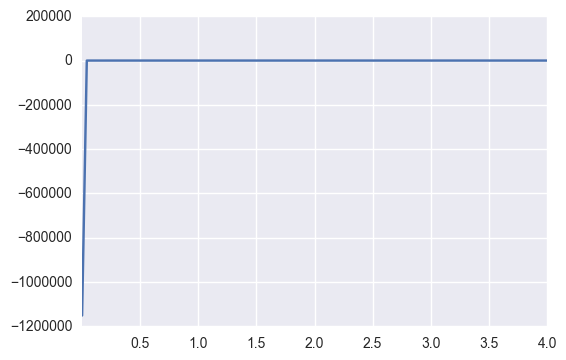

In [229]:
%matplotlib inline
ser = pd.Series(s, index=c)
ser.plot.line()

## Small components

In [8]:
from sympy import LambertW

In [13]:
n = 70
p = np.linspace(np.finfo(float).eps, 0.4, 1000)
c = p * (n-1)
ss = lambda c_: 1 + LambertW(-c_ * np.exp(-c_)) / c_ if c_ >= 1. else 0.
f_ss = np.vectorize(ss)
m_c = 1 / (1 -  c[1:] + c[1:]*f_ss(c[1:]))

R   = 2 / (2 -  c[1:] + c[1:]*f_ss(c[1:]))

In [9]:
import matplotlib.pyplot as plt

## Fraction of nodes on giant component

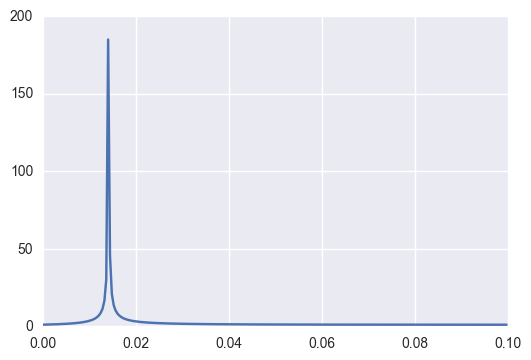

In [17]:
%matplotlib inline 
plt.plot(p[0:250], f_ss(c[0:250]);
# plt.savefig('../figures/s_as_function_of_p.png')

In [16]:
n = 1000
p = np.linspace(np.finfo(float).eps, 0.4, 1000)
c = p * (n-1)
ss = lambda c_: 1 + LambertW(-c_ * np.exp(-c_)) / c_ if c_ >= 1. else 0.
f_ss = np.vectorize(ss)
m_c = 1 / (1 -  c[1:] + c[1:]*f_ss(c[1:]))

R   = 2 / (2 -  c[1:] + c[1:]*f_ss(c[1:]))

In [24]:
def giant_component_fraction(n = 70, p=None):
    """
    Returns the expected fractional size of the giant component under a G_{n,p}
    """
    if p is None:
        p = np.linspace(np.finfo(float).eps, 0.4, 1000)[1:]
    c = p * (n-1)
    f_S_lambda = lambda c_: 1 + LambertW(-c_ * np.exp(-c_)) / c_ if c_ >= 1. else 0.
    f_S = np.vectorize(f_S_lambda)
    S = f_S(c)
    mean_s = 1 / (1 - c + c*S)
    R =      2 / (2 - c + c*S)
    
    return S, mean_s, R, p

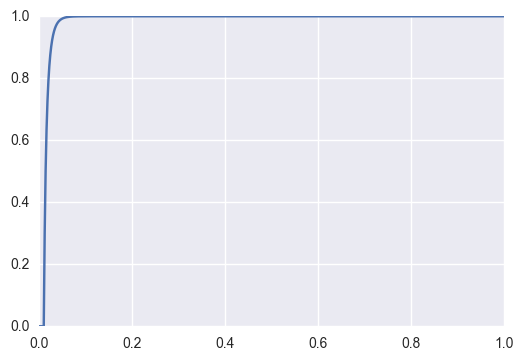

In [26]:
%matplotlib inline 
p = np.linspace(np.finfo(float).eps, 1.0, 1000)
S, mean_s, R, p = giant_component_fraction(n=100, p=p)
plt.plot(p, S) #f_ss(c)[0:]);
# plt.savefig('../figures/s_as_function_of_p.png')

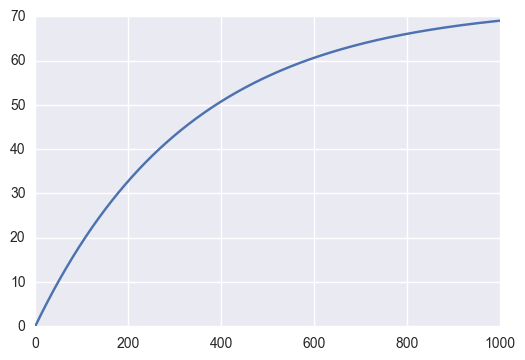

In [112]:
%matplotlib inline
plt.plot(cdf(p, α) * (n-1))

In [18]:
from scipy.stats import expon
from bokeh.palettes import inferno

In [19]:
f = lambda x, α: expon.pdf(x, scale=1/α) / (1-np.exp(-α))
cdf = lambda x, α: expon.cdf(x, scale=1/α) / (1-np.exp(-α))

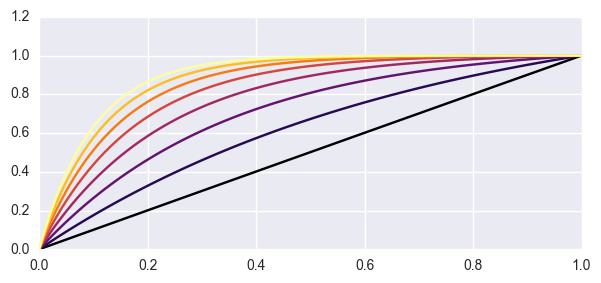

In [88]:
%matplotlib inline
plt.figure(figsize=(7,3))
ax = plt.axes()
ax.hold(True)
xdata = np.linspace(0,1,100)
nlines = 8
colors = inferno(nlines)
for i,α in enumerate(np.linspace(0.01,10.,nlines)):
    ydata = cdf(xdata, α)
    plt.plot(xdata, ydata, axes=ax, color=colors[i])

In [89]:
%matplotlib inline 
ydata
# p = np.linspace(np.finfo(float).eps, 1.0, 1000)
# m_c, R, p = giant_component_fraction(n=70, p=1-x)
# plt.plot(m_c);
# plt.savefig('../figures/s_as_function_of_p.png')

array([ 0.        ,  0.09608046,  0.18292988,  0.26143515,  0.33239794,
        0.39654291,  0.45452507,  0.50693654,  0.55431251,  0.59713679,
        0.63584668,  0.67083747,  0.70246648,  0.7310567 ,  0.75690009,
        0.78026054,  0.80137661,  0.82046393,  0.83771742,  0.85331326,
        0.86741071,  0.88015374,  0.89167246,  0.90208451,  0.91149621,
        0.92000367,  0.92769377,  0.93464503,  0.94092844,  0.94660817,
        0.95174221,  0.95638299,  0.96057791,  0.96436979,  0.96779736,
        0.97089563,  0.97369622,  0.97622775,  0.97851606,  0.98058451,
        0.98245424,  0.98414433,  0.98567204,  0.98705298,  0.98830124,
        0.98942957,  0.9904495 ,  0.99137144,  0.9922048 ,  0.99295809,
        0.99363901,  0.99425451,  0.99481088,  0.99531379,  0.99576839,
        0.99617931,  0.99655075,  0.9968865 ,  0.99718999,  0.99746433,
        0.99771231,  0.99793646,  0.99813908,  0.99832223,  0.99848779,
        0.99863744,  0.99877271,  0.99889499,  0.99900551,  0.99

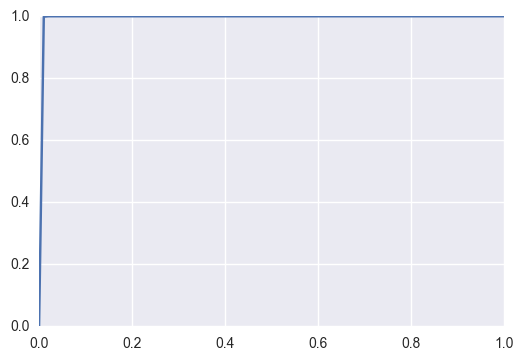

In [70]:
%matplotlib inline
n = 70
ρ = np.linspace(0., 1., 100)
α = 10.
p = cdf(ρ, α)

ydata = giant_component_fraction(n, p=p)
plt.plot(ρ, ydata[0])

In [68]:
n

70

In [72]:
c = np.exp(-α  * ρ) * (n-1)
np.piecewise(c, [c < 1, c >= 1], [-1, 1])

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [80]:
f_S_lambda = lambda c_: 1 + LambertW(-c_ * np.exp(-c_)) / c_ if c_ >= 1. else 0.
f_S = np.vectorize(f_S_lambda)
S = f_S(c)

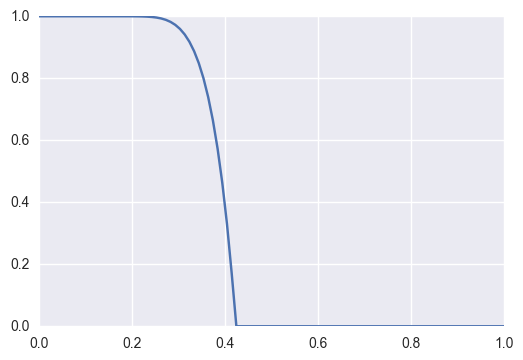

In [81]:
%matplotlib inline
plt.plot(ρ, S)

## $\pi_s$

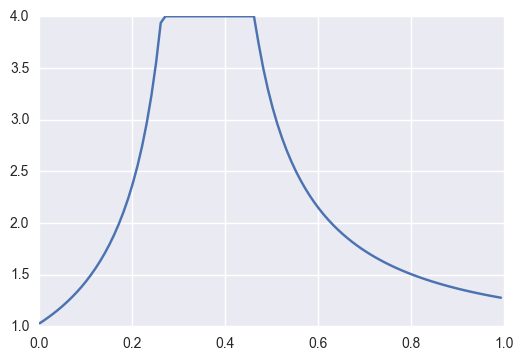

In [236]:
%matplotlib inline
plt.plot(c[0:100], np.clip(m_c[0:100], 0, 4));
plt.savefig('../figures/pi_s.png')
plt.xlabel("$c$", fontsize=13)
plt.ylabel("$S$", fontsize=13)
# plt.savefig("../figures/2_s_as_function_of_c.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

## Average size of small components

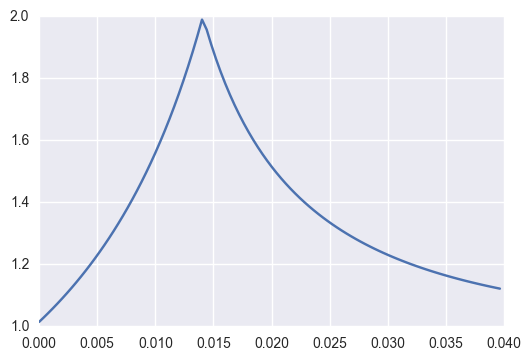

In [271]:
%matplotlib inline
plt.plot(p[0:100], R[0:100])
plt.savefig('../figures/gnp_size_small_components.png');

## Number of components

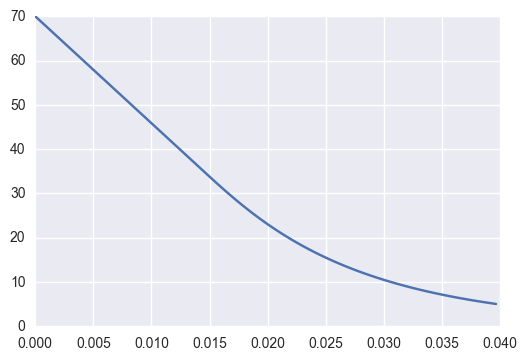

In [270]:
%matplotlib inline
comp = lambda n, c, S: n * (1 - S - 0.5 * c * (1-S) ** 2)
plt.plot(p[0:100], comp(n, c[0:100], f_ss(c[0:100])));
plt.savefig('../figures/gnp_number_components.png');

## Size of components

$$\frac{e^{-s c} (s c)^{s-1}}{s!}$$

In [93]:
fct = np.vectorize(math.factorial)


pi_s = lambda s, c: np.exp( - s * c) * c * (s * c) ** (s-2) / fct(s-1)
n_s  = lambda s, c, n: n / s * pi_s(s, c)
# pi_s2 = np.exp(-sz * c2) * (sz * c2) ** (sz-1) / fct(sz)

In [88]:
sz = np.linspace(1,20,20)
n = 75
p1 = 0.01
p2 = 0.02
c1 = p1 * (n-1)
c2 = p2 * (n-1)
pi_s1 = np.exp(-sz * c1) * (sz * c1) ** (sz-1) / fct(sz)
pi_s2 = np.exp(-sz * c2) * (sz * c2) ** (sz-1) / fct(sz)

In [91]:
pi_s1 - pi_s(sz, c1)
pi_s2 - pi_s(sz, c2)

array([  0.00000000e+00,   0.00000000e+00,  -6.93889390e-18,
         0.00000000e+00,   1.73472348e-18,  -1.73472348e-18,
        -8.67361738e-19,   8.67361738e-19,   0.00000000e+00,
        -4.33680869e-19,   4.33680869e-19,   4.33680869e-19,
         0.00000000e+00,  -2.16840434e-19,   0.00000000e+00,
         0.00000000e+00,  -1.08420217e-19,   0.00000000e+00,
         1.08420217e-19,   0.00000000e+00])

In [84]:
pi_s1 = np.exp(-sz * c1) * (sz * c1) ** (sz-1) / fct(sz)
pi_s2 = np.exp(-sz * c2) * (sz * c2) ** (sz-1) / fct(sz)

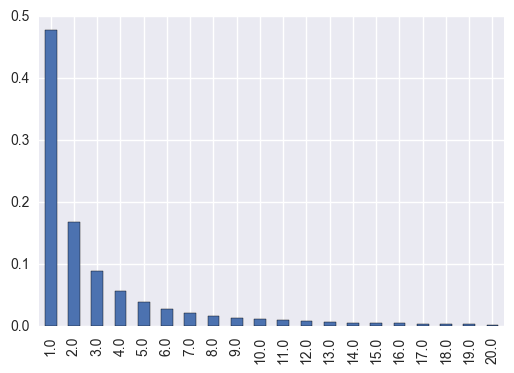

In [85]:
%matplotlib inline
pd.Series(pi_s1, index=sz).plot.bar()

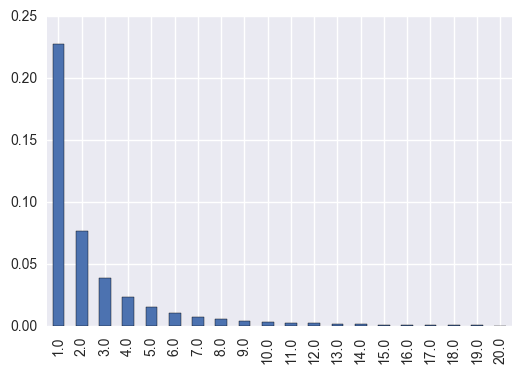

In [86]:
%matplotlib inline
pd.Series(pi_s2, index=sz).plot.bar()

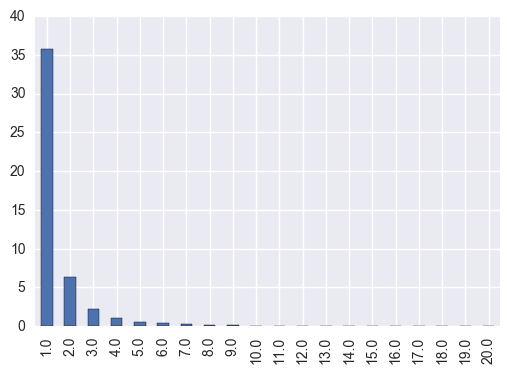

In [94]:
%matplotlib inline
pd.Series(n_s(sz, c1, n), index=sz).plot.bar()

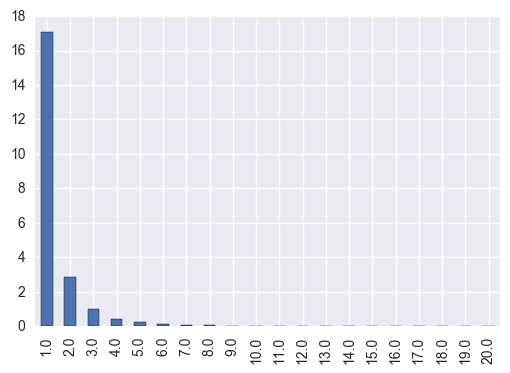

In [97]:
%matplotlib inline
dist_component_sizes = pd.Series(n_s(sz, c2, n), index=sz)
dist_component_sizes.plot.bar()

In [113]:
cdf_dist_comp_sizes = dist_component_sizes.cumsum() / dist_component_sizes.cumsum()[sz[-1]]

In [116]:
(cdf_dist_comp_sizes ** dist_component_sizes.cumsum()[sz[-1]]).diff()

1.0          NaN
2.0     0.113480
3.0     0.215560
4.0     0.190673
5.0     0.138493
6.0     0.096061
7.0     0.066552
8.0     0.046710
9.0     0.033343
10.0    0.024214
11.0    0.017870
12.0    0.013384
13.0    0.010158
14.0    0.007802
15.0    0.006056
16.0    0.004746
17.0    0.003752
18.0    0.002989
19.0    0.002398
20.0    0.001936
dtype: float64

In [233]:
c = np.linspace(0.001, 4., 400)
r = fnx.ramping.giant_component_fraction(c)

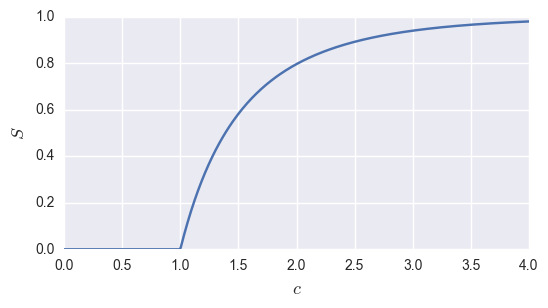

In [235]:
plt.figure(figsize=(6,3))
# plt.title("$n = %d$" % n, fontsize=14)
plt.plot(c, r)
# fig.suptitle('test title', fontsize=20)
plt.xlabel("$c$", fontsize=13)
plt.ylabel("$S$", fontsize=13)
plt.savefig("../figures/2_s_as_function_of_c.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

## Uniform weight distribution

In [142]:
ρ = np.linspace(0, 1., 1000)
n = 100
c = (1-ρ) * (n-1)
r = fnx.ramping.giant_component_fraction(c)

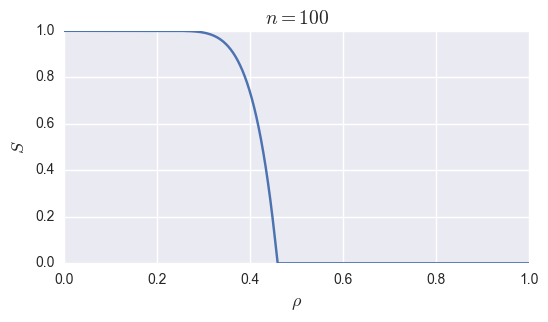

In [226]:
plt.figure(figsize=(6,3))
plt.title("$n = %d$" % n, fontsize=14)
plt.plot(ρ, r)
# fig.suptitle('test title', fontsize=20)
plt.xlabel("$\\rho$", fontsize=13)
plt.ylabel("$S$", fontsize=13)
plt.savefig("../figures/3_uniform_giant_component.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

## Exponential weight distribution

In [166]:
from bokeh.palettes import inferno

In [181]:
ρ = np.linspace(0, 1., 1000)
n = 100

In [160]:
g = lambda x, α: expon.pdf(x, scale=1/α) / (1-np.exp(-α))
G = lambda x, α: expon.cdf(x, scale=1/α) / (1-np.exp(-α))

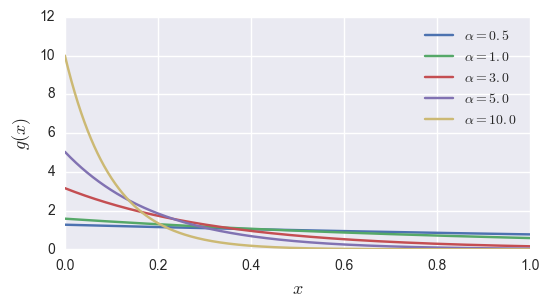

In [225]:
plt.figure(figsize=(6,3))
# plt.title("$n = %d$" % n, fontsize=14)
plt.hold(True)
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$g(x)$", fontsize=13)

alphas = [0.5, 1.0, 3., 5., 10.]
colors = inferno(len(alphas))
lines = []
xdata = ρ
for i, α in enumerate(alphas):
    ydata = g(xdata, α)
    l, = plt.plot(xdata, ydata, label="$\\alpha = %.1f$" % α)
    lines.append(l)

lgd = plt.legend(handles = lines, loc='best')
plt.savefig("../figures/3_exponential_distribution_pdf.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

In [162]:
α = 5
c = (1-G(ρ, α)) * (n-1)
r = fnx.ramping.giant_component_fraction(c)

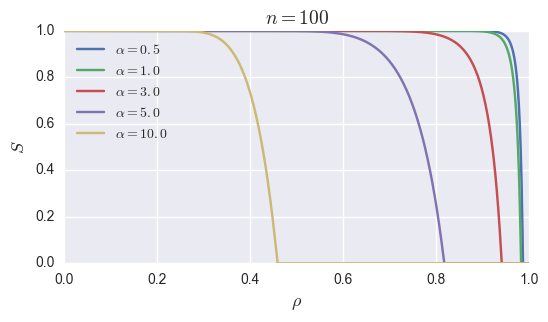

In [224]:
plt.figure(figsize=(6,3))
plt.title("$n = %d$" % n, fontsize=14)
plt.hold(True)
plt.xlabel("$\\rho$", fontsize=13)
plt.ylabel("$S$", fontsize=13)

alphas = [0.5, 1.0, 3., 5., 10.]
colors = inferno(len(alphas))
lines = []
for i, α in enumerate(alphas):
    c = (1-G(ρ, α)) * (n-1)
    r = fnx.ramping.giant_component_fraction(c)
    l, = plt.plot(ρ, r, label="$\\alpha = %.1f$" % α)
    lines.append(l)

plt.legend(handles = lines, loc='best')
plt.savefig("../figures/3_exponential_giant_component.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

In [208]:
sz = np.linspace(1,10,10)
n = 100
p1 = 0.08
p2 = 1.02
c1 = p1 * (n-1)
c2 = p2 * (n-1)
pi_s1 = np.exp(-sz * c1) * (sz * c1) ** (sz-1) / fct(sz)
pi_s2 = np.exp(-sz * c2) * (sz * c2) ** (sz-1) / fct(sz)

In [195]:
fnx.ramping.dist_comp_sizes(sz, c1)

array([  4.77113916e-01,   8.42259447e-02,   2.97371740e-02,
         1.39988459e-02,   7.72264485e-03,   4.71154783e-03,
         3.08180082e-03,   2.12137821e-03,   1.51840296e-03,
         1.12083912e-03,   8.48278702e-04,   6.55374311e-04,
         5.15186269e-04,   4.11007361e-04,   3.32094806e-04,
         2.71324676e-04,   2.23845433e-04,   1.86275526e-04,
         1.56209389e-04,   1.31904511e-04])

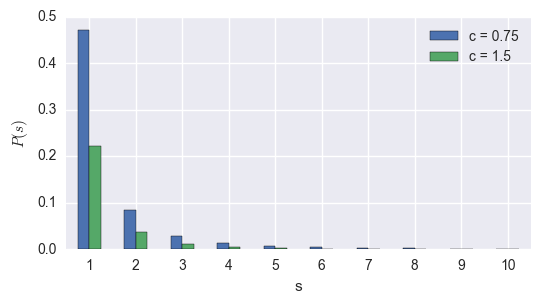

In [227]:
c1 = .75
c2 = 1.5
dist_component_sizes = pd.DataFrame( {"c = 0.75": fnx.ramping.dist_comp_sizes(sz, c1), "c = 1.5":fnx.ramping.dist_comp_sizes(sz, c2)}, index=range(1,len(sz)+1))
ax = dist_component_sizes.plot.bar(figsize=(6,3), rot=0)
ax.set_xlabel("s")
ax.set_ylabel("$P(s)$")
plt.savefig("../figures/3_distribution_sizes.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

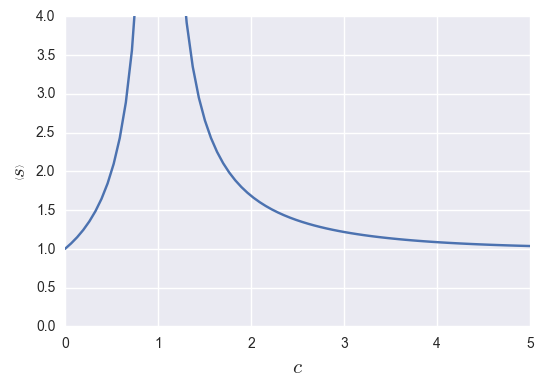

In [267]:
%matplotlib inline
c = np.linspace(0, 5.1, 79)
plt.plot(c, fnx.ramping.avg_comp_size(c), )
plt.ylim([0,4])
plt.xlim([0,5])
plt.ylabel("$\\left< s \\right>$", fontsize=15)
plt.xlabel("$c$", fontsize=15)
plt.savefig('../figures/2_mean_size_small_components.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)
# plt.savefig("../figures/2_s_as_function_of_c.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)